In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
mapes_arima = pd.read_csv("mapes_arima.csv", index_col=0)
mape_svr = pd.read_csv("mapes_svm.csv", index_col=0)
mape_rnn = pd.read_csv("mapes_rnn.csv", index_col=0)

frames = [mapes_arima, mape_svr, mape_rnn]
mapes = pd.concat(frames)


In [3]:

mapes.rename(columns={0 : "MAPE"}, inplace=True)
mapes["MAPE"]=mapes["0"]
mapes=mapes.drop(["0"],axis=1)


In [4]:
mapes

,MAPE
No Exogenous Model,2.120378
Only Bayram Exog. Model,2.379565
Only Tatil Exog. Model,2.906935
Only Haftasonu Exog. Model,2.409198
No Bayram Exog. Model,2.070892
No Haftasonu Model,2.172145
No Tatil Model,2.570569
All Including Model,2.143154
SVM-7-days,2.341229
SVM-14-days,1.968906


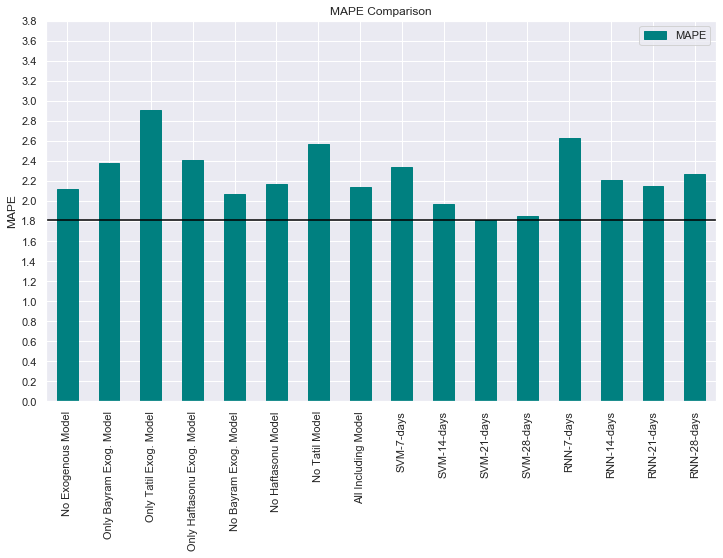

In [5]:
sns.set(rc={'figure.figsize':(12, 7)})
bars=mapes.plot.bar(color="teal",edgecolor="teal")
plt.yticks(np.arange(0, 4,0.20))
plt.axhline(y=min(mapes["MAPE"]),color="black")
plt.ylabel('MAPE')
plt.title('MAPE Comparison')

plt.savefig("bar_plot_mapes.svg",format="svg")
plt.show()

In [6]:
results=pd.DataFrame(pd.read_csv("consumption_daily.csv",index_col=0, parse_dates=True, squeeze=True))
results=results["2019"]
preds = pd.DataFrame(pd.read_csv("the_best_svr_pred.csv",index_col=0, parse_dates=True, squeeze=True))


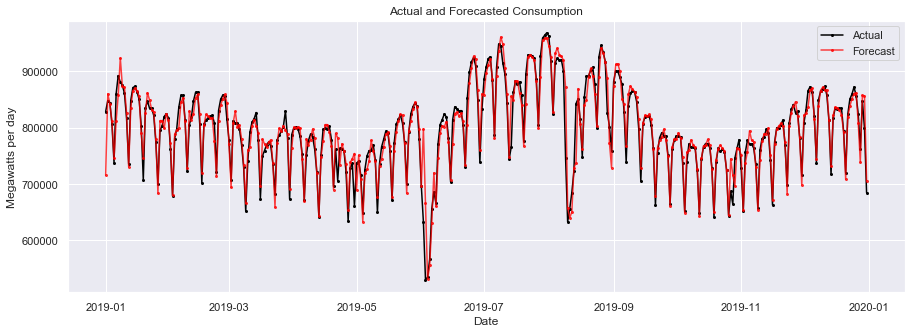

In [7]:
sns.set(rc={'figure.figsize':(15, 5)})

plt.plot(results,color="black", marker="o",markersize=2)
plt.plot(preds,color="red",marker="o",markersize=2,alpha=0.75)

plt.title("Actual and Forecasted Consumption")
plt.ylabel("Megawatts per day")
plt.xlabel("Date")
plt.legend(['Actual', 'Forecast']);

plt.savefig("comparison_of_the_best_model_and_actual_yearly.svg", format="svg")
plt.show()


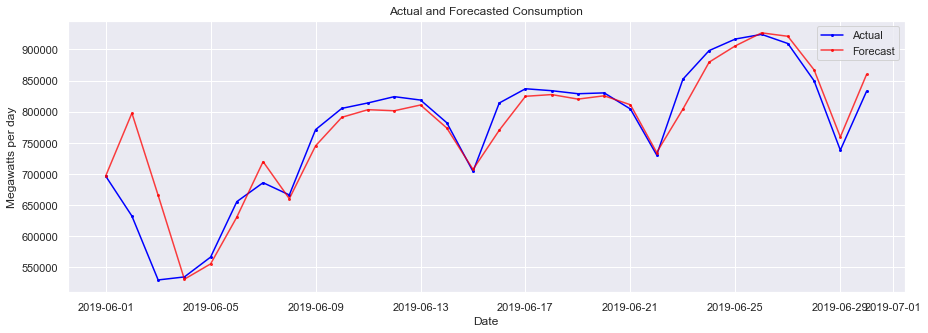

In [8]:
sns.set(rc={'figure.figsize':(15, 5)})

plt.plot(results["2019-06"],color="blue", marker="o",markersize=2)
plt.plot(preds["2019-06"],color="red",marker="o",markersize=2,alpha=0.75)

plt.title("Actual and Forecasted Consumption")
plt.ylabel("Megawatts per day")
plt.xlabel("Date")
plt.legend(['Actual', 'Forecast']);

plt.savefig("comparison_of_the_best_model_and_actual_monthly.svg", format="svg")

plt.show()